In [1]:
# Market basket analysis
# Load the libraries
library(arules)
library(arulesViz)
library(datasets)

groceries <- read.transactions("C:\\Users\\radha31\\Downloads\\groceries.csv", sep = ",")

#data2 <- as.data.frame(data2)
print(head(groceries))

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: grid
Warning message in readLines(file, encoding = encoding):
"incomplete final line found on 'C:\Users\radha31\Downloads\groceries.csv'"

transactions in sparse format with
 6 transactions (rows) and
 169 items (columns)


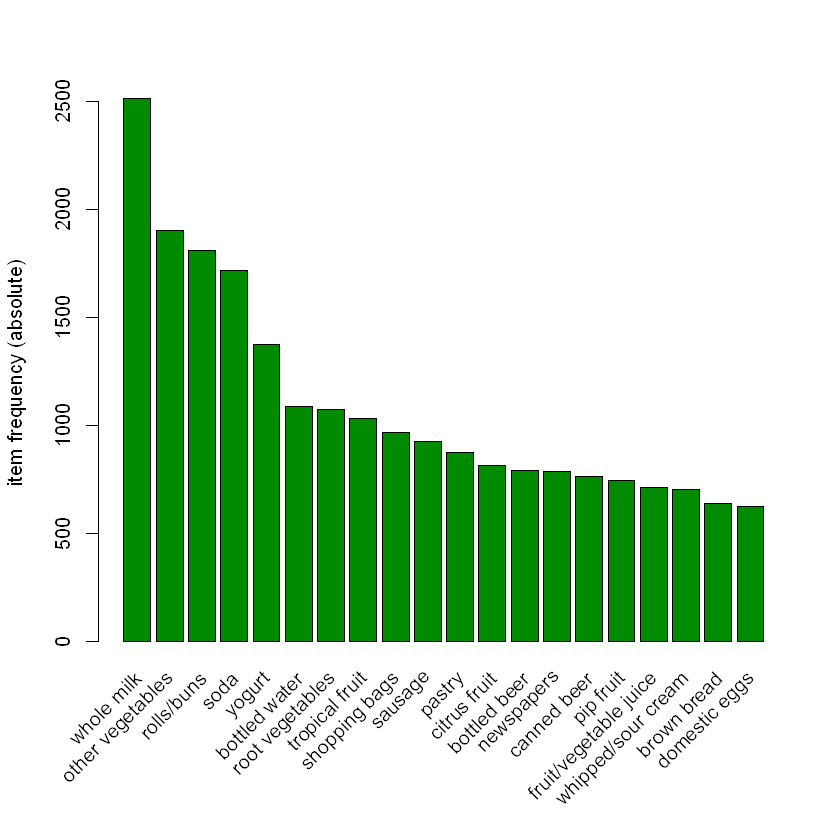

In [2]:
#print(data2)
itemFrequencyPlot(groceries,topN=20,type="absolute", col = "green4")

In [3]:
# Get the rules
rules <- apriori(groceries, parameter = list(supp = 0.001, conf = 0.6, maxlen=10))
rules<-sort(rules, by="confidence", decreasing=TRUE)
# Show the top 5 rules, but only 2 digits
options(digits=2)
inspect(rules[1:10])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [2918 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs                support confidence lift count
[1]  {rice,                                                                  
      sugar}              => {whole milk}        0.0012          1  3.9    12
[2]  {canned fish,                           

In [4]:
rules<-apriori(data=groceries, parameter=list(supp=0.001,conf = 0.08), 
               appearance = list(default="lhs",rhs="whole milk"),
               control = list(verbose=F))
rules<-sort(rules, decreasing=TRUE,by="confidence")
inspect(rules[1:5])

    lhs                     rhs          support confidence lift count
[1] {rice,                                                            
     sugar}              => {whole milk}  0.0012          1  3.9    12
[2] {canned fish,                                                     
     hygiene articles}   => {whole milk}  0.0011          1  3.9    11
[3] {butter,                                                          
     rice,                                                            
     root vegetables}    => {whole milk}  0.0010          1  3.9    10
[4] {flour,                                                           
     root vegetables,                                                 
     whipped/sour cream} => {whole milk}  0.0017          1  3.9    17
[5] {butter,                                                          
     domestic eggs,                                                   
     soft cheese}        => {whole milk}  0.0010          1  3.9    10


In [5]:
rules<-apriori(data=groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2), 
               appearance = list(default="rhs",lhs="whole milk"),
               control = list(verbose=F))
rules<-sort(rules, decreasing=TRUE,by="confidence")
inspect(rules[1:5])

    lhs             rhs                support confidence lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       1.6  416  


In [6]:
library(arulesViz)
plot(rules,method="graph",engine='interactive',shading=NA)